# **Importing Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import shutil
import seaborn as sns

# Download the dataset
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

# Define your desired destination
destination_path = "/content/project"

# Move the downloaded dataset to the desired destination
#shutil.move(path, destination_path)
file_path = "/content/project/Housing.csv"
# from google.colab import drive
# drive.mount('/gdrive')
df = pd.read_csv(file_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **Data Exploration and Visualization**

### Plotting Histograms for numerical column  

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

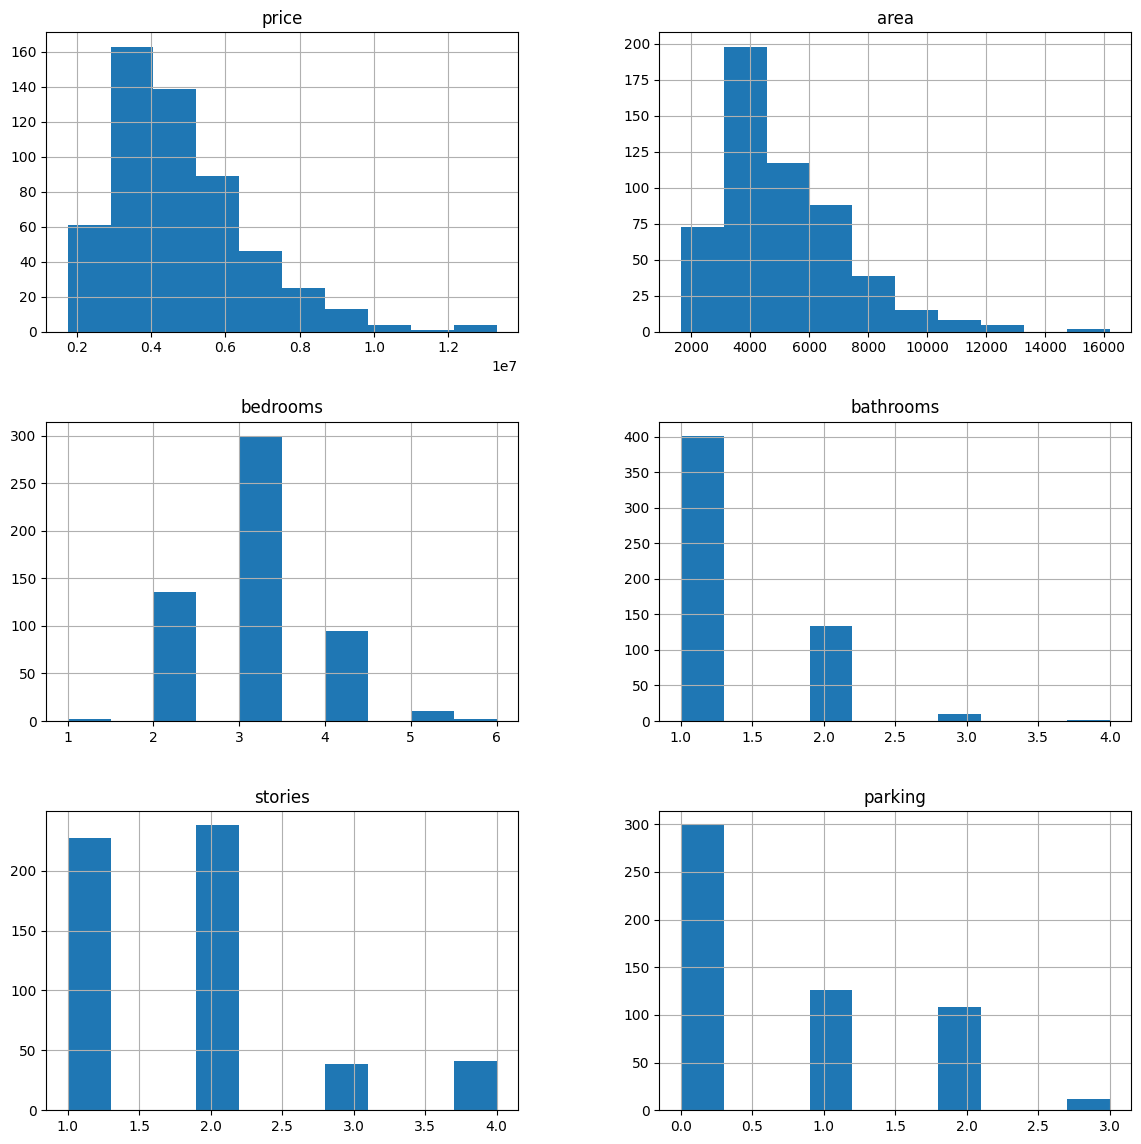

In [ ]:
selected = df.iloc[:,:-1]
selected.hist(figsize=(14,14))

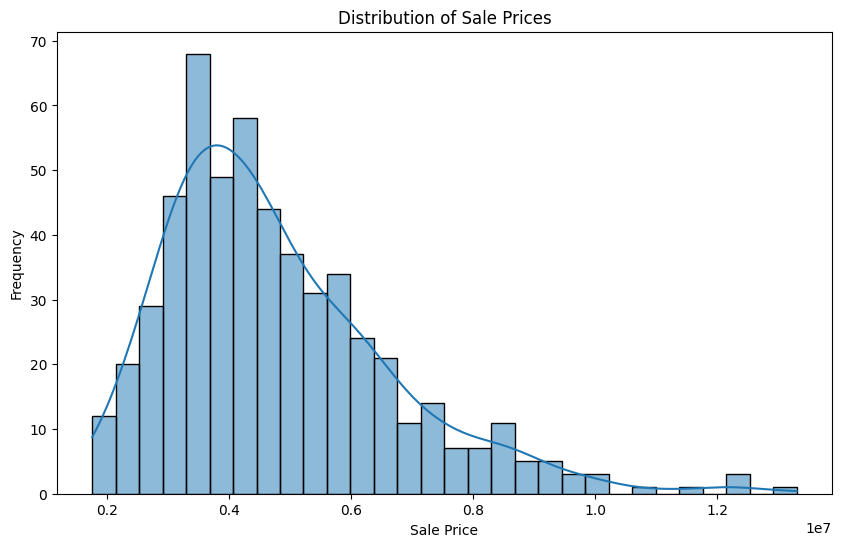

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


### Plotting Scatter Plots

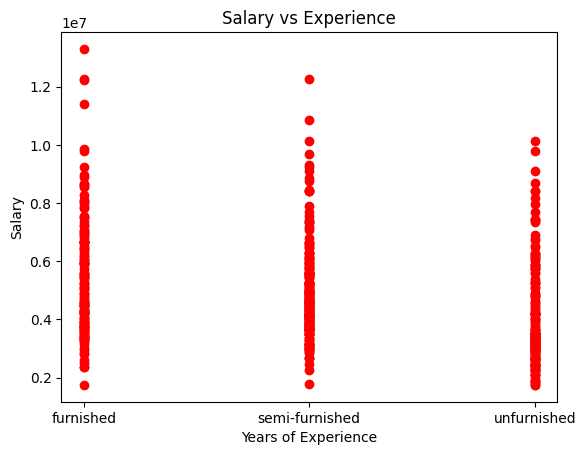

In [ ]:

plt.scatter(df['furnishingstatus'], df['price'], color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Plotting Density Plots


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

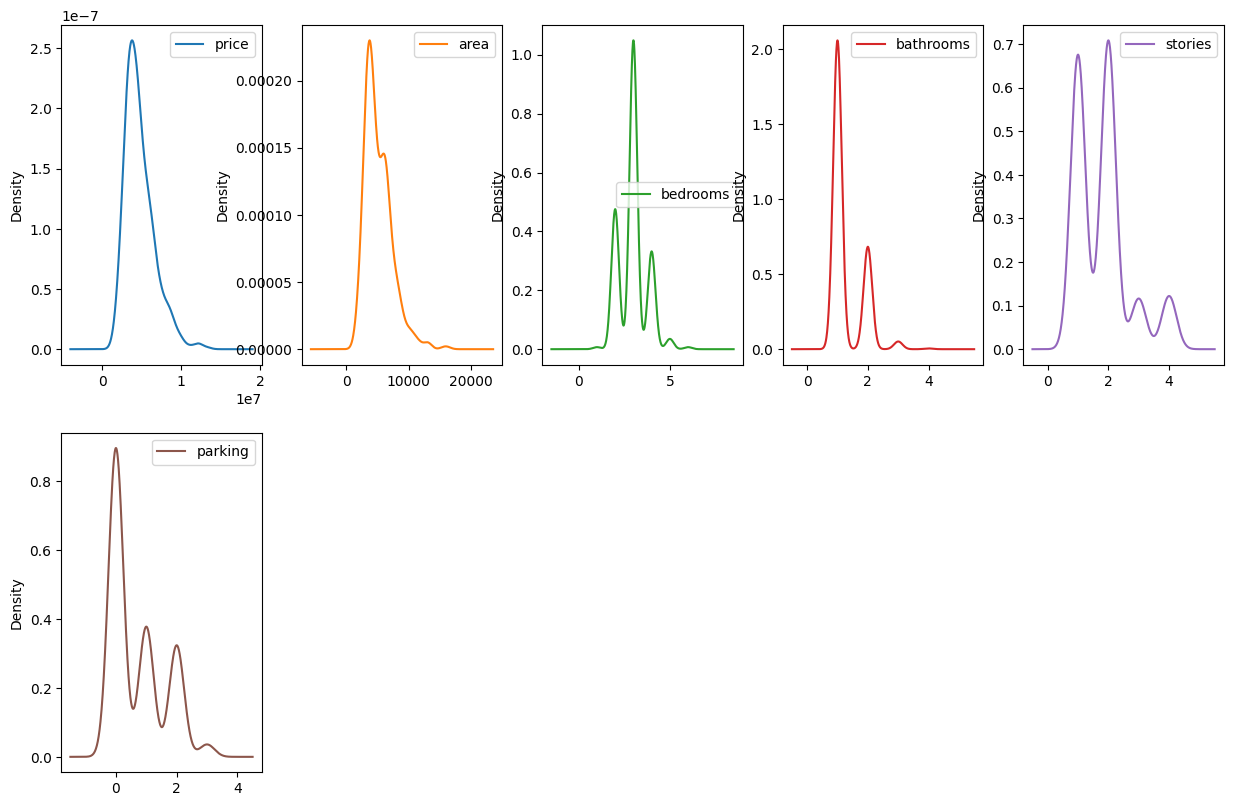

In [ ]:
selected = df.loc[:,['price','area','bedrooms','bathrooms','stories','parking']]
selected.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))

### Probability Density Functions

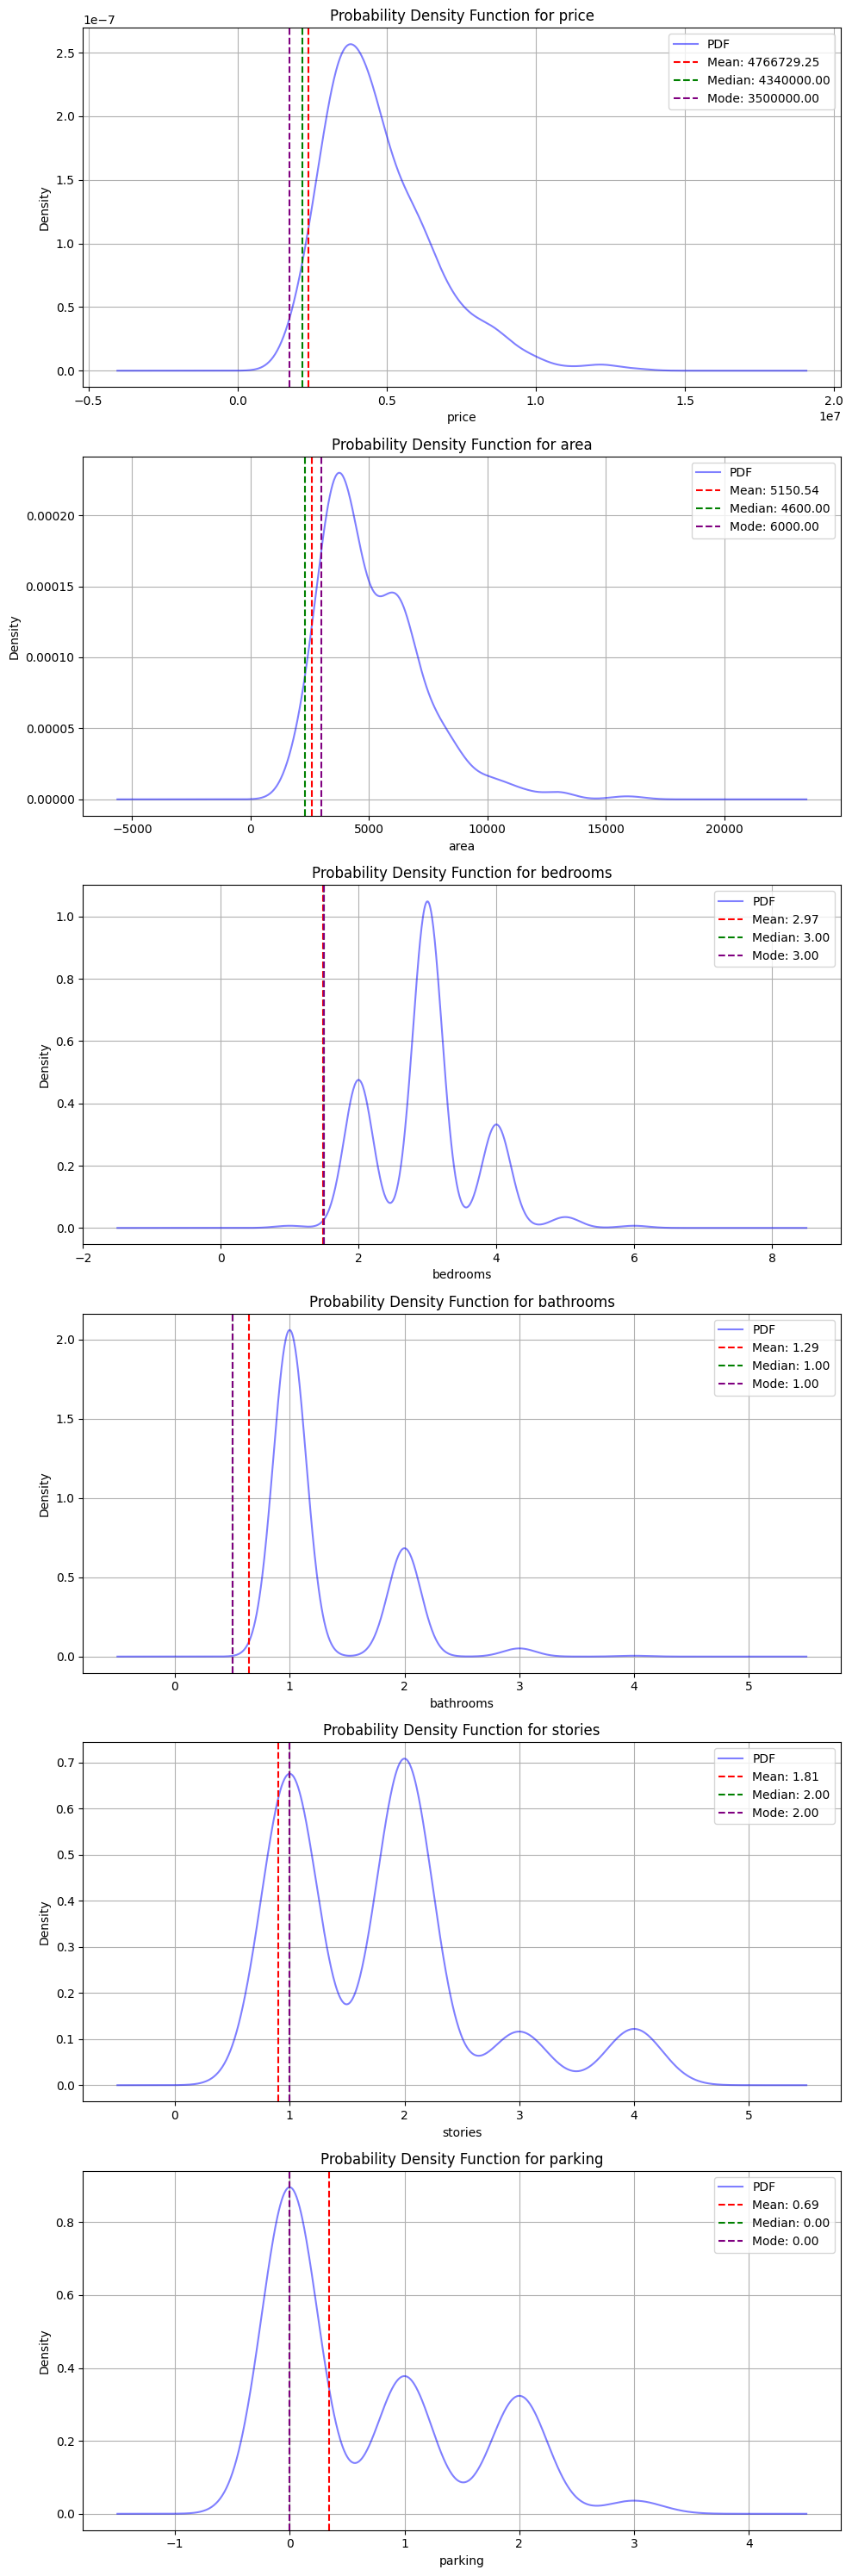

In [ ]:

# Setting up the plot
num_features = 6
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(selected):
    # Plotting the density
    df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean / 2, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=median / 2, color='green', linestyle='--', label=f'Median: {median:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=mode / 2, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  # Adjusted y-value for visibility

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Computing the skewness

In [ ]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.skew()

,0
price,1.212239
area,1.321188
bedrooms,0.495684
bathrooms,1.589264
stories,1.082088
parking,0.842062


### Plotting Box Plots

,0
price,"Axes(0.125,0.747241;0.227941x0.132759)"
area,"Axes(0.398529,0.747241;0.227941x0.132759)"
bedrooms,"Axes(0.672059,0.747241;0.227941x0.132759)"
bathrooms,"Axes(0.125,0.587931;0.227941x0.132759)"
stories,"Axes(0.398529,0.587931;0.227941x0.132759)"
parking,"Axes(0.672059,0.587931;0.227941x0.132759)"


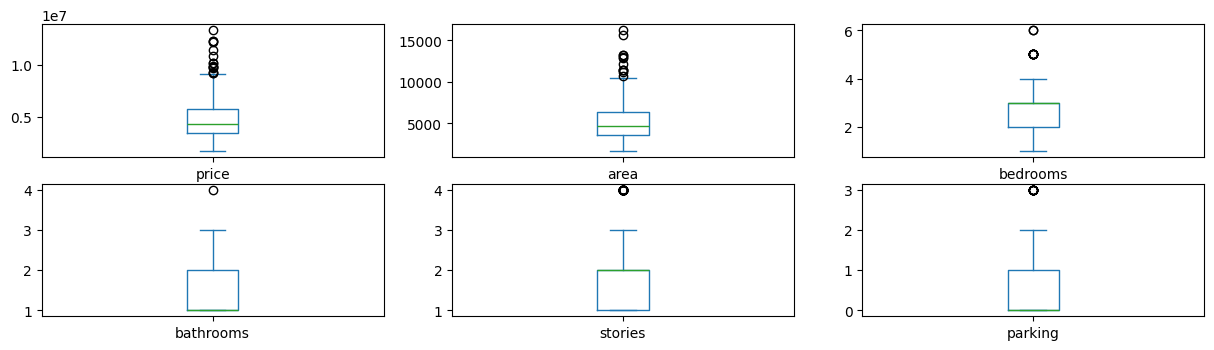

In [ ]:
selected.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10))

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Checking for NaN values

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# **Data Cleaning**

### Removing NaN values

In [ ]:
missing_percentage = df.isnull().sum() / len(df) * 100

threshold = 65

columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


### Removing Outliers

In [ ]:
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

In [ ]:
Q1 = np.percentile(df['area'], 25)
Q3 = np.percentile(df['area'], 75)
IQR = Q3 - Q1
df = df[(df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 * IQR)]

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Dropping Duplicates

In [ ]:
df = df.drop_duplicates()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Correlation

In [ ]:
corr_matrix = selected.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


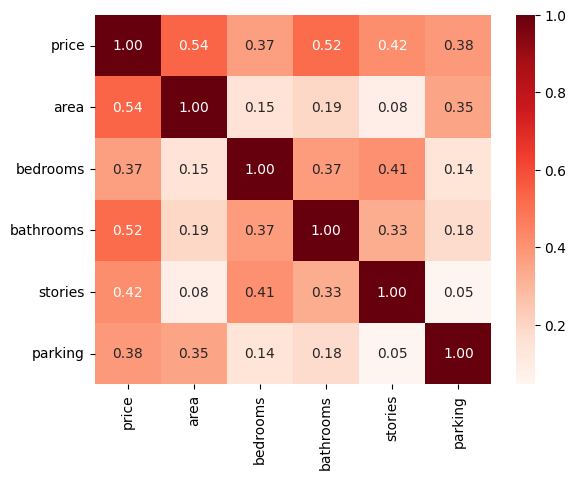

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt='.2f')

plt.show()

# **Feature Scaling**

### Normalization

In [ ]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.499426,0.6,0.0,0.333333,yes,no,yes,no,no,0.666667,no,semi-furnished
16,1.000000,0.568312,0.6,0.5,0.333333,yes,yes,yes,no,yes,0.333333,yes,unfurnished
17,0.980952,0.786452,0.4,0.5,1.000000,yes,no,no,no,yes,0.666667,no,furnished
18,0.971429,0.338691,0.4,0.5,0.333333,yes,yes,no,no,yes,0.666667,no,furnished
19,0.966667,0.547646,0.4,0.5,0.333333,yes,no,no,no,yes,0.333333,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.009524,0.154994,0.2,0.0,0.000000,yes,no,yes,no,no,0.666667,no,unfurnished
541,0.002333,0.086108,0.4,0.0,0.000000,no,no,no,no,no,0.000000,no,semi-furnished
542,0.000000,0.226177,0.2,0.0,0.000000,yes,no,no,no,no,0.000000,no,unfurnished
543,0.000000,0.144661,0.4,0.0,0.000000,no,no,no,no,no,0.000000,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.383520,0.371999,0.388395,0.130561,0.264990,0.217924
std,0.216983,0.204268,0.146340,0.232684,0.288402,0.281127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.214696,0.200000,0.000000,0.000000,0.000000
50%,0.338095,0.327210,0.400000,0.000000,0.333333,0.000000
75%,0.514286,0.505166,0.400000,0.000000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Q-Q Plots

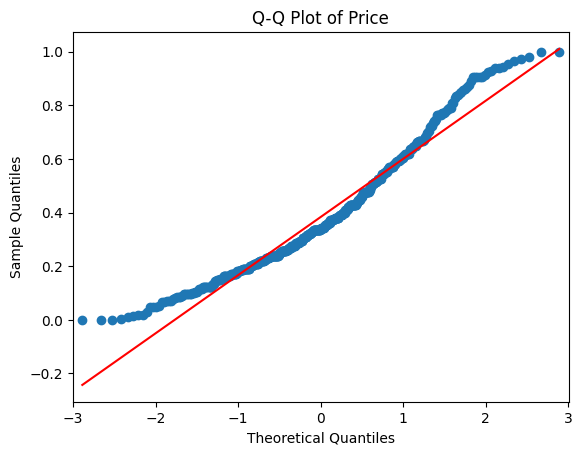

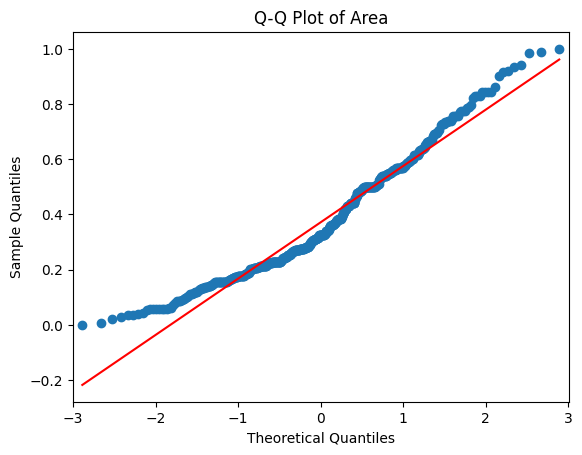

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(df['price'], line='s')
plt.title(f'Q-Q Plot of Price')
plt.show()

fig = sm.qqplot(df['area'], line='s')
plt.title(f'Q-Q Plot of Area')
plt.show()

In [ ]:
from scipy import stats
stats.kstest(df['price'],'norm')  #kolmogrov-smirnov test for normal distribution

KstestResult(statistic=0.5015819504866901, pvalue=7.453141444158479e-121, statistic_location=0.047619047619047644, statistic_sign=-1)

In [ ]:

stats.shapiro(df['area'])  #shapiro-wilk test for normal distribution

ShapiroResult(statistic=0.956598253457559, pvalue=3.355377704704299e-11)

# **Data Splitting & One Hot Encoding**

### One Hot Encoding

In [ ]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=binary_columns, drop_first=True)


In [ ]:
df


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,1.000000,0.499426,0.6,0.0,0.333333,0.666667,semi-furnished,True,False,True,False,False,False
16,1.000000,0.568312,0.6,0.5,0.333333,0.333333,unfurnished,True,True,True,False,True,True
17,0.980952,0.786452,0.4,0.5,1.000000,0.666667,furnished,True,False,False,False,True,False
18,0.971429,0.338691,0.4,0.5,0.333333,0.666667,furnished,True,True,False,False,True,False
19,0.966667,0.547646,0.4,0.5,0.333333,0.333333,semi-furnished,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.009524,0.154994,0.2,0.0,0.000000,0.666667,unfurnished,True,False,True,False,False,False
541,0.002333,0.086108,0.4,0.0,0.000000,0.000000,semi-furnished,False,False,False,False,False,False
542,0.000000,0.226177,0.2,0.0,0.000000,0.000000,unfurnished,True,False,False,False,False,False
543,0.000000,0.144661,0.4,0.0,0.000000,0.000000,furnished,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
parking,0
furnishingstatus,0
mainroad_yes,0
guestroom_yes,0
basement_yes,0


### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Target column
target = 'furnishingstatus'

# Features (X) and Target (y)
X = df.drop(columns=[target])
X = df.select_dtypes(include=['float64', 'int64'])

y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (465, 6)
Testing Features Shape: (52, 6)
Training Target Shape: (465,)
Testing Target Shape: (52,)


# **Feature Extraction and Selection**

### Applying PCA

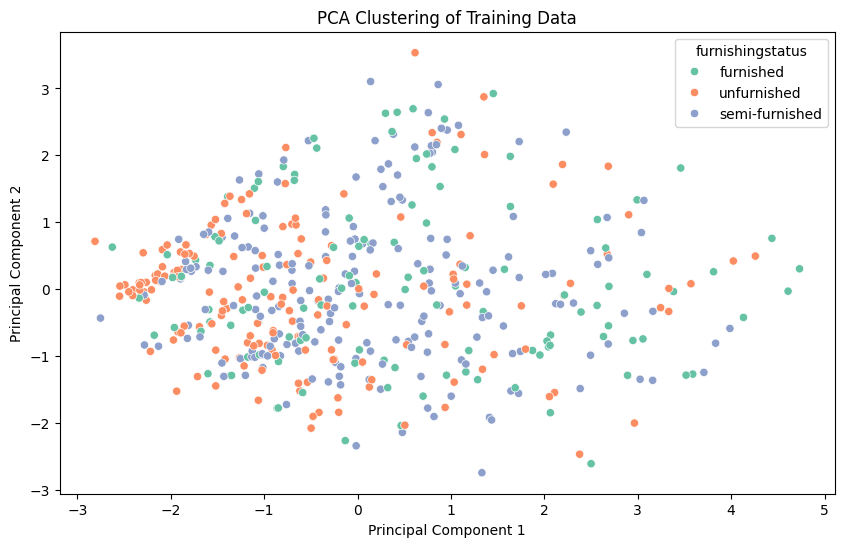

In [ ]:
# Training set visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='furnishingstatus',
    palette='Set2',
    data=X_train_pca_df
)
plt.title('PCA Clustering of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply PCA for 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create PCA DataFrames for visualization
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
X_train_pca_df['furnishingstatus'] = y_train.values


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

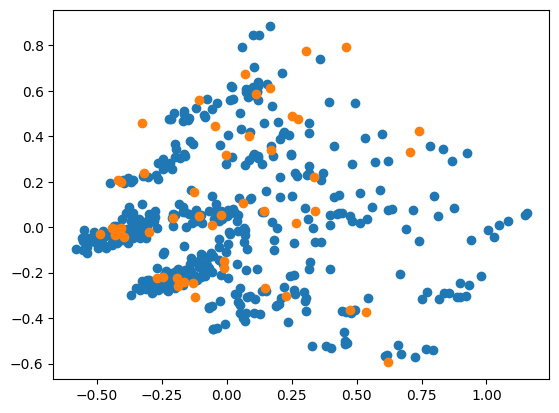

In [ ]:
plt.scatter(x=X_trainPCA[:,0],y=X_trainPCA[:,1])
plt.scatter(x=X_testPCA[:,0],y=X_testPCA[:,1])

# **Classification**

# Decision Tree Classification

### Without PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#predicting the test set
y_pred = classifier.predict(X_test)
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['semi-furnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['unfurnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'unfurnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['semi-furnished' 'furnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' '

In [ ]:
#the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 1  6  5]
 [ 7 13  6]
 [ 3  1 10]]


0.46153846153846156

### With PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_trainPCA, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#predicting the test set
y_pred = classifier.predict(X_testPCA)
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['unfurnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['unfurnished' 'unfurnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['furnished' 'furnished']
 ['unfurnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'unfurnished']
 ['furnished' 'furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'semi-

In [ ]:
#the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  5  5]
 [ 4 14  8]
 [ 2  5  7]]


0.4423076923076923

# Random Forest Classification

### Without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['semi-furnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['semi-furnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'unfurnished']
 ['furnished' 'furnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 4  6  2]
 [11  9  6]
 [ 3  2  9]]


0.4230769230769231

### With PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_trainPCA, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_testPCA)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['unfurnished' 'furnished']
 ['unfurnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'unfurnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['furnished' 'unfurnished']
 ['unfurnished' 'semi-furnished']
 ['unfurnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['semi-furnished' 'unfurnished']
 ['semi-furnished' 'furnished']
 ['furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['furnished' 'unfurnished']
 ['furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'semi-furnished']
 ['unfurnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'semi-furnished']
 ['semi-furnished' 'furnished']
 ['semi-furnished' 'unfurnished']
 ['unfurnished' 'furnished']
 ['unfurnished' 'semi-furnished']
 ['unfurnis

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 1  7  4]
 [ 6 11  9]
 [ 3  5  6]]


0.34615384615384615

# Logistic Regression

# Without PCA

In [ ]:
# Do logistic regression on the iris dataset
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = log_model.predict(X_test)

predictions


array(['semi-furnished', 'unfurnished', 'unfurnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'semi-furnished', 'unfurnished',
       'semi-furnished', 'unfurnished', 'unfurnished', 'unfurnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'unfurnished', 'semi-furnished', 'unfurnished',
       'unfurnished', 'unfurnished', 'semi-furnished', 'unfurnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'unfurnished', 'unfurnished', 'semi-furnished',
       'semi-furnished', 'unfurnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'unfurnished', 'unfurnished',
       'unfurnished', 'semi-furnished', 'semi-furnished'], dtype=object)

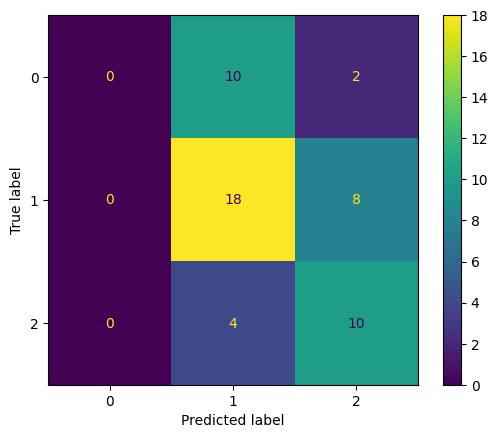

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
lr_accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 53.84615384615385 %


# With PCA

In [ ]:
# Do logistic regression on the iris dataset
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_trainPCA, y_train)

# Make predictions on the test data
predictions = log_model.predict(X_testPCA)

predictions


array(['semi-furnished', 'unfurnished', 'unfurnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'unfurnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'unfurnished', 'unfurnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'unfurnished', 'unfurnished', 'semi-furnished', 'unfurnished',
       'unfurnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'unfurnished', 'unfurnished', 'semi-furnished',
       'semi-furnished', 'semi-furnished', 'unfurnished',
       'semi-furnished', 'semi-furnished', 'semi-furnished',
       'semi-furnished', 'unfurnished', 'semi-furnished', 'unfurnished',
       'unfurnished', 'unfurnished', 'semi-furnished', 'unfurnished'],
      dtype=object

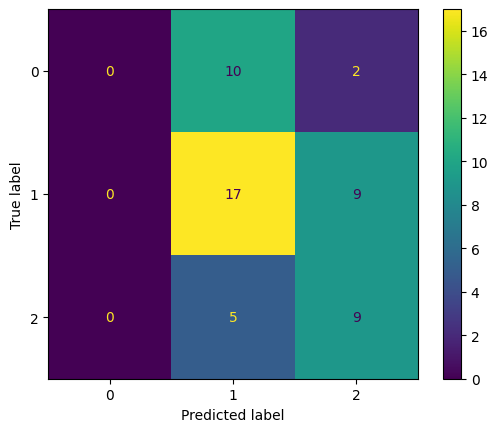

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
lr_accuracy = accuracy_score(y_test, predictions)

print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 50.0 %
